## Fifa 18 analysis

<a href="https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset">Dataset</a> provided by Kaggle.com

### We are going to find:
<ol>
    <li>The players who are the most overpaid based on their fifa rating.</li>
    <li>The players who are the most underpaid based on their fifa rating.</li>
    <li>The most accurate free kick takers at different rating ranges.</li>
    <li>Which positions the most accurate free kick takers like to play.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<span style="color:gray"><i>Create database and specify low memory option on import to prevent dtype error warning.

In [2]:
df = pd.read_csv('CompleteDataset.csv', low_memory=False)
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:gray"><i>Show all columns, because not all are visable above.

In [3]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

<span style="color:gray"><i>Let's narrow down the dataframe to only necessary columns.

In [4]:
df = df[['Name', 'Overall', 'Value', 'Free kick accuracy', 'Preferred Positions']]
df.head()

,Name,Overall,Value,Free kick accuracy,Preferred Positions
0,Cristiano Ronaldo,94,€95.5M,76,ST LW
1,L. Messi,93,€105M,90,RW
2,Neymar,92,€123M,84,LW
3,L. Suárez,92,€97M,84,ST
4,M. Neuer,92,€61M,11,GK


<span style="color:gray"><i>Convert free kick accuracy from strings to integers

In [5]:
df[['Free kick accuracy']] = pd.to_numeric(df['Free kick accuracy'], errors='coerce')

<span style="color:gray"><i>Create function for cleaning "Value" column.<br>
<a href="https://www.kaggle.com/chomi87/eda-on-fifa-2018">Source</a>

In [6]:
def extract_value_from(value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in value:
        out = float(out.replace('K', ''))*1000
    return float(out)

<span style="color:gray"><i>Clean 'Value' column.

In [7]:
df['Value'] = df['Value'].apply(lambda x: extract_value_from(x))
df['Value'] = df['Value'].apply(lambda x: x/1000000)
df.head()

,Name,Overall,Value,Free kick accuracy,Preferred Positions
0,Cristiano Ronaldo,94,95.5,76.0,ST LW
1,L. Messi,93,105.0,90.0,RW
2,Neymar,92,123.0,84.0,LW
3,L. Suárez,92,97.0,84.0,ST
4,M. Neuer,92,61.0,11.0,GK


## Visualizations

### #1) The players who are the most overpaid based on their fifa rating.

<span style="color:gray"><i>Find "Value" mean for all players with the same Overall rating.

In [8]:
group_mean = df[['Overall','Value']].groupby('Overall').mean()
group_mean.columns = ['Rating Group Avg']
group_mean = group_mean.reset_index()
group_mean.head()
df2 = pd.merge(df, group_mean, on='Overall')
df2[['Rating Group Avg']] = df2[['Rating Group Avg']].apply(lambda x: round(x, 2))
df2.head(10)

,Name,Overall,Value,Free kick accuracy,Preferred Positions,Rating Group Avg
0,Cristiano Ronaldo,94,95.5,76.0,ST LW,95.50
1,L. Messi,93,105.0,90.0,RW,105.00
2,Neymar,92,123.0,84.0,LW,93.67
3,L. Suárez,92,97.0,84.0,ST,93.67
4,M. Neuer,92,61.0,11.0,GK,93.67
5,R. Lewandowski,91,92.0,84.0,ST,92.00
6,De Gea,90,64.5,19.0,GK,72.60
7,E. Hazard,90,90.5,79.0,LW,72.60
8,T. Kroos,90,79.0,84.0,CDM CM,72.60
9,G. Higuaín,90,77.0,62.0,ST,72.60


<span style="color:gray"><i>Create new column named "paid above average" for player's value - mean for ranking

In [9]:
df2['Paid Above Avg'] = df2['Value'] - df2['Rating Group Avg']
df2.head(10)

,Name,Overall,Value,Free kick accuracy,Preferred Positions,Rating Group Avg,Paid Above Avg
0,Cristiano Ronaldo,94,95.5,76.0,ST LW,95.50,0.00
1,L. Messi,93,105.0,90.0,RW,105.00,0.00
2,Neymar,92,123.0,84.0,LW,93.67,29.33
3,L. Suárez,92,97.0,84.0,ST,93.67,3.33
4,M. Neuer,92,61.0,11.0,GK,93.67,-32.67
5,R. Lewandowski,91,92.0,84.0,ST,92.00,0.00
6,De Gea,90,64.5,19.0,GK,72.60,-8.10
7,E. Hazard,90,90.5,79.0,LW,72.60,17.90
8,T. Kroos,90,79.0,84.0,CDM CM,72.60,6.40
9,G. Higuaín,90,77.0,62.0,ST,72.60,4.40


<span style="color:gray"><i>Sort by new column and plot chart player's name on bottom and paid above average on the left

In [10]:
df_sorted_by_paa = df2.sort_values('Paid Above Avg', ascending=False)
df_sorted_by_paa.head(10)

,Name,Overall,Value,Free kick accuracy,Preferred Positions,Rating Group Avg,Paid Above Avg
2,Neymar,92,123.0,84.0,LW,93.67,29.33
19,P. Dybala,88,79.0,84.0,ST CAM,51.25,27.75
11,K. De Bruyne,89,83.0,83.0,RM CM CAM,55.62,27.38
21,A. Griezmann,88,75.0,75.0,LW RW ST,51.25,23.75
35,P. Pogba,87,66.5,82.0,CDM CM,46.88,19.62
22,Thiago,88,70.5,77.0,CDM CAM CM,51.25,19.25
50,R. Lukaku,86,59.0,66.0,ST,40.72,18.28
46,H. Kane,86,59.0,66.0,ST,40.72,18.28
127,K. Mbappé,83,41.5,58.0,ST,23.26,18.24
36,C. Eriksen,87,65.0,87.0,LM RM CAM,46.88,18.12


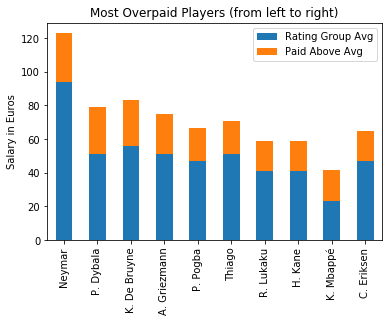

In [11]:
players = df_sorted_by_paa.head(10)
paa_chart = players[['Rating Group Avg', 'Paid Above Avg', 'Name']]
ax = paa_chart.plot.bar(stacked = True)
ax.set_xticklabels(paa_chart.Name, rotation=90)
ax.set_ylabel('Salary in Euros')
ax.set_title('Most Overpaid Players (from left to right)')
ax

### #2) The players who are the most underpaid based on their fifa rating.

<span style="color:gray"><i>Reverse the sort order and plot chart with same methodology

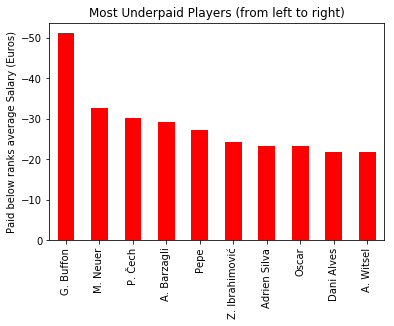

In [12]:
paa_descending = df2.sort_values('Paid Above Avg').head(10)
paa_descending = paa_descending[['Paid Above Avg', 'Name']]
ax = paa_descending.plot.bar(color='red')
ax.legend_.remove()
ax.invert_yaxis()
ax.set_xticklabels(paa_descending.Name, rotation=90)
ax.set_ylabel('Paid below ranks average Salary (Euros)')
ax.set_title('Most Underpaid Players (from left to right)')
ax

### #3) The most accurate free kick takers at different rating ranges.

<span style="color:gray"><i>Find top Free kick accuracy rating for each overall rating

In [13]:
grouped_by_fka = df[['Overall','Free kick accuracy']].groupby('Overall').max()
grouped_by_fka.columns = ['Top FKA of Rating']
grouped_by_fka = grouped_by_fka.reset_index()
df3 = pd.merge(df, grouped_by_fka, on='Overall')
df3.head(10)

,Name,Overall,Value,Free kick accuracy,Preferred Positions,Top FKA of Rating
0,Cristiano Ronaldo,94,95.5,76.0,ST LW,76.0
1,L. Messi,93,105.0,90.0,RW,90.0
2,Neymar,92,123.0,84.0,LW,84.0
3,L. Suárez,92,97.0,84.0,ST,84.0
4,M. Neuer,92,61.0,11.0,GK,84.0
5,R. Lewandowski,91,92.0,84.0,ST,84.0
6,De Gea,90,64.5,19.0,GK,84.0
7,E. Hazard,90,90.5,79.0,LW,84.0
8,T. Kroos,90,79.0,84.0,CDM CM,84.0
9,G. Higuaín,90,77.0,62.0,ST,84.0


<span style="color:gray"><i>Make a list of each player with the highest accuracy rating in their group

In [14]:
df3 = df3.drop(df3[df3['Free kick accuracy'] != df3['Top FKA of Rating']].index)

<span style="color:gray"><i>List of all top free kick takers

In [15]:
df3

,Name,Overall,Value,Free kick accuracy,Preferred Positions,Top FKA of Rating
0,Cristiano Ronaldo,94,95.500,76.0,ST LW,76.0
1,L. Messi,93,105.000,90.0,RW,90.0
2,Neymar,92,123.000,84.0,LW,84.0
3,L. Suárez,92,97.000,84.0,ST,84.0
5,R. Lewandowski,91,92.000,84.0,ST,84.0
8,T. Kroos,90,79.000,84.0,CDM CM,84.0
15,G. Bale,89,69.500,85.0,RW,85.0
19,P. Dybala,88,79.000,84.0,ST CAM,84.0
36,C. Eriksen,87,65.000,87.0,LM RM CAM,87.0
47,J. Rodríguez,86,56.000,86.0,RM CM CAM,86.0


<span style="color:gray"><i>Plot chart by players accurace rating on left and ranking on bottom, and possibly players name. Add opacity so darker dots represent multiple players with same rating and accuracy.

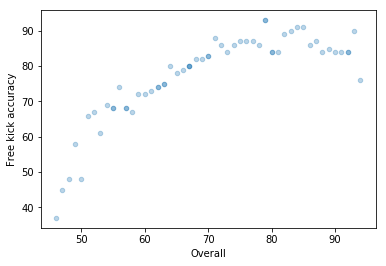

In [16]:
df3.plot.scatter("Overall", "Free kick accuracy", alpha=0.3)

### #4)Which positions the most accurate free kick takers like to play.

<span style="color:gray"><i>Using the list of high accuracy players, create a function that will seperate players preferred positions into catagories and add them to a dictionary

In [17]:
positions = {}

def sort_positions(x):
    split_pos = x.split(' ')
    for pos in split_pos:
        if (pos == ''):
            continue
        else:
            if (pos not in positions):
                positions[pos] = 1
            else:
                positions[pos] += 1;  

df3['Preferred Positions'].apply(lambda x: sort_positions(x))
positions

{'CAM': 24,
 'CB': 3,
 'CDM': 13,
 'CF': 3,
 'CM': 22,
 'LB': 6,
 'LM': 13,
 'LW': 4,
 'LWB': 1,
 'RB': 1,
 'RM': 10,
 'RW': 3,
 'ST': 8}

<span style="color:gray"><i>Plot chart with preferred positions on the bottom and how many players prefer those positions on the left

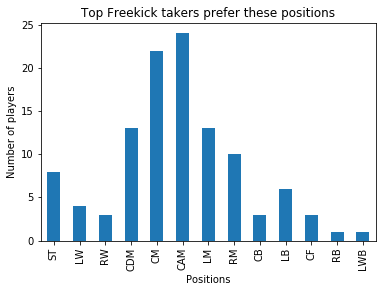

In [18]:
df4 = pd.DataFrame.from_dict(positions, orient='index')
ax = df4.plot.bar(legend=False, title="Top Freekick takers prefer these positions")
ax.set_ylabel("Number of players")
ax.set_xlabel("Positions")
ax